# yuv

In [4]:
pwd

'/work/van-speech-nlp/jindaznb/j-vis'

In [10]:
import os
import cv2

def rgb_to_yuv(rgb_image):
    yuv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2YUV)
    return yuv_image

def convert_images_to_yuv_in_place(input_dir):
    # 遍历输入目录下的所有文件和子目录
    for root, dirs, files in os.walk(input_dir):
        for file_name in files:
            print(file_name)
            # 仅处理文件名以.jpg结尾的文件
            if file_name.lower().endswith('.jpg'):
                # 构建输入文件的完整路径
                input_path = os.path.join(root, file_name)
                
                # 读取图像
                image = cv2.imread(input_path)
                
                # 将RGB图像转换为YUV格式
                yuv_image = rgb_to_yuv(image)
                
                # 覆盖原始RGB图像文件
                cv2.imwrite(input_path, yuv_image)
                print(f"Converted {input_path} to YUV")
dir_folder="ForestFire2023-5-yuv"
input_directory = f"{dir_folder}/train"
convert_images_to_yuv_in_place(input_directory)

input_directory = f"{dir_folder}/valid"
convert_images_to_yuv_in_place(input_directory)

input_directory = f"{dir_folder}/test"
convert_images_to_yuv_in_place(input_directory)

-763RD_7nVc_jpg.rf.19f584888daa50bbdb51f46605f33073.jpg
Converted ForestFire2023-5-yuv/train/-763RD_7nVc_jpg.rf.19f584888daa50bbdb51f46605f33073.jpg to YUV
-763RD_7nVc_jpg.rf.c9076f9fe33b690bcc6b9c43ba821fbe.jpg
Converted ForestFire2023-5-yuv/train/-763RD_7nVc_jpg.rf.c9076f9fe33b690bcc6b9c43ba821fbe.jpg to YUV
-763RD_7nVc_jpg.rf.f50f2ac1bd961665e90b38019af65f8f.jpg
Converted ForestFire2023-5-yuv/train/-763RD_7nVc_jpg.rf.f50f2ac1bd961665e90b38019af65f8f.jpg to YUV
0YebmVr8QYj_jpg.rf.49332dfc20006f0dfb08ff1a1fa75f8e.jpg
Converted ForestFire2023-5-yuv/train/0YebmVr8QYj_jpg.rf.49332dfc20006f0dfb08ff1a1fa75f8e.jpg to YUV
0YebmVr8QYj_jpg.rf.99f3fca614d26cedd07a528b9c599fd4.jpg
Converted ForestFire2023-5-yuv/train/0YebmVr8QYj_jpg.rf.99f3fca614d26cedd07a528b9c599fd4.jpg to YUV
0YebmVr8QYj_jpg.rf.c3664a8ab6cd4fab171ee100dadcd896.jpg
Converted ForestFire2023-5-yuv/train/0YebmVr8QYj_jpg.rf.c3664a8ab6cd4fab171ee100dadcd896.jpg to YUV
1-pD4Idag_T_jpg.rf.241bed8cb2a775d318d8b4be839e1f01.jpg
Converte

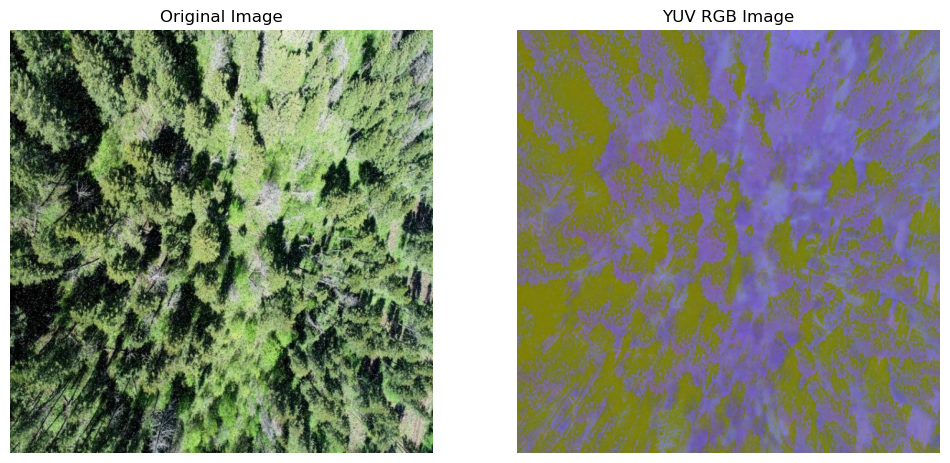

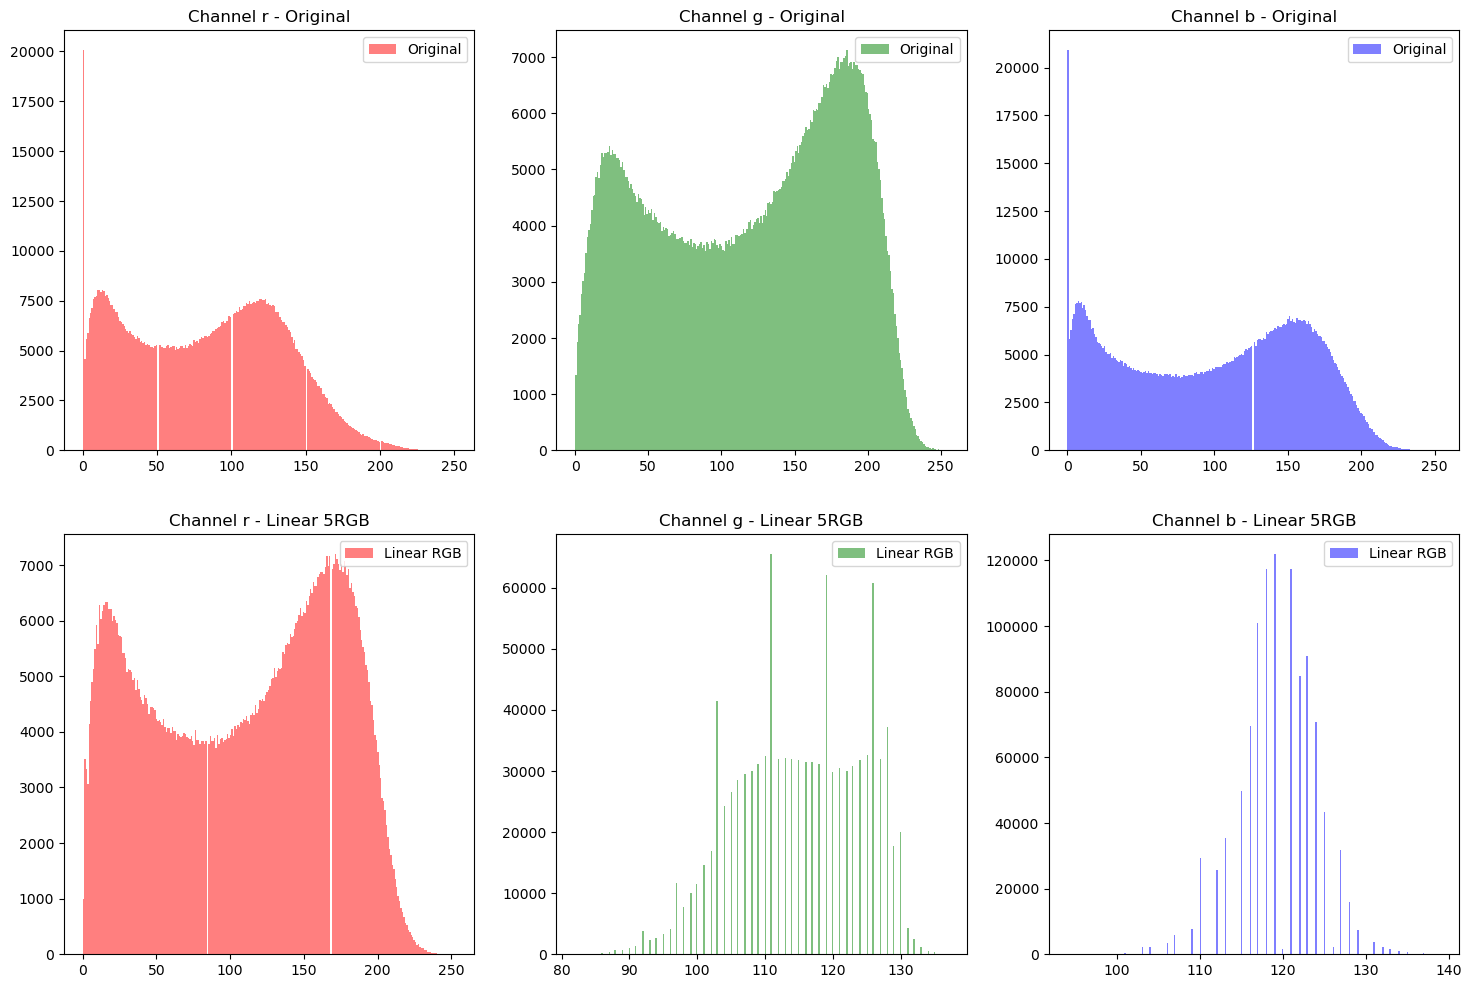

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

# Convert the image to linear RGB
yuv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2YUV)


# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(yuv_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('YUV RGB Image')
axs[1].axis('off')
plt.savefig('yuv.png')
plt.show()

# Plot histograms for the original and linear RGB images
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
colors = ('r', 'g', 'b')
for i in range(3):
    axs[0, i].hist(original_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Original')
    axs[0, i].legend(loc='upper right')
    axs[0, i].set_title(f'Channel {colors[i]} - Original')
    axs[1, i].hist(yuv_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Linear RGB')
    axs[1, i].legend(loc='upper right')
    axs[1, i].set_title(f'Channel {colors[i]} - Linear 5RGB')
plt.show()


# plot 3d

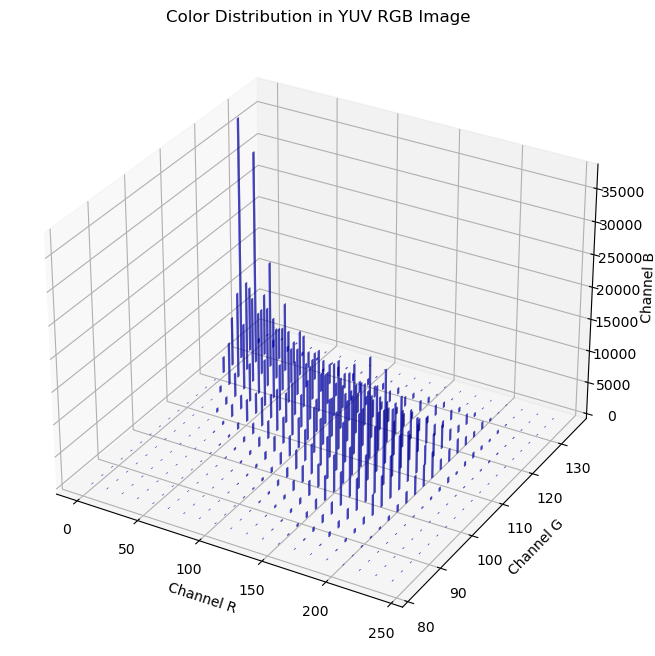

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

# Convert the image to linear RGB
yuv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2YUV)



# 3D Rectangular plot for YUV RGB image
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = yuv_image[:, :, 0].flatten(), yuv_image[:, :, 1].flatten(), yuv_image[:, :, 2].flatten()
hist, xedges, yedges = np.histogram2d(x, y, bins=20)

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color='b', alpha=0.5)

ax.set_xlabel('Channel R')
ax.set_ylabel('Channel G')
ax.set_zlabel('Channel B')
ax.set_title('Color Distribution in YUV RGB Image')

plt.show()


# HSV

In [16]:
# import os
# import cv2

# def rgb_to_hsv(rgb_image):
#     hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
#     return yuv_image

# def convert_images_to_hsv_in_place(input_dir):
#     # 遍历输入目录下的所有文件和子目录
#     for root, dirs, files in os.walk(input_dir):
#         for file_name in files:
#             print(file_name)
#             # 仅处理文件名以.jpg结尾的文件
#             if file_name.lower().endswith('.jpg'):
#                 # 构建输入文件的完整路径
#                 input_path = os.path.join(root, file_name)
                
#                 # 读取图像
#                 image = cv2.imread(input_path)
                
#                 # 将RGB图像转换为YUV格式
#                 yuv_image = rgb_to_hsv(image)
                
#                 # 覆盖原始RGB图像文件
#                 cv2.imwrite(input_path, yuv_image)
#                 print(f"Converted {input_path} to hsv")

In [12]:
# dir_folder="ForestFire2023-5-hsv"
# input_directory = f"{dir_folder}/train"
# convert_images_to_yuv_in_place(input_directory)

# input_directory = f"{dir_folder}/valid"
# convert_images_to_yuv_in_place(input_directory)

# input_directory = f"{dir_folder}/test"
# convert_images_to_yuv_in_place(input_directory)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

# Convert the image to linear RGB
yuv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2LAB)


# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(yuv_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('lab Image')
axs[1].axis('off')
plt.show()

# Plot histograms for the original and linear RGB images
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
colors = ('r', 'g', 'b')
for i in range(3):
    axs[0, i].hist(original_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Original')
    axs[0, i].legend(loc='upper right')
    axs[0, i].set_title(f'Channel {colors[i]} - Original')
    axs[1, i].hist(yuv_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Linear RGB')
    axs[1, i].legend(loc='upper right')
    axs[1, i].set_title(f'Channel {colors[i]} - Lab')
plt.savefig('yuv.png')
plt.show()


# lab

In [14]:
import os
import cv2

def rgb_to_lab(rgb_image):
    lab_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2LAB)
    return lab_image

def convert_images_to_lab_in_place(input_dir):
    for root, dirs, files in os.walk(input_dir):
        for file_name in files:
            print(file_name)
            # 仅处理文件名以.jpg结尾的文件
            if file_name.lower().endswith('.jpg'):
                # 构建输入文件的完整路径
                input_path = os.path.join(root, file_name)
                
                # 读取图像
                image = cv2.imread(input_path)
                
                # 将RGB图像转换为LAB格式
                lab_image = rgb_to_lab(image)
                
                # 覆盖原始RGB图像文件
                cv2.imwrite(input_path, lab_image)
                print(f"Converted {input_path} to LAB")

In [15]:
dir_folder="ForestFire2023-5-lab"
input_directory = f"{dir_folder}/train"
convert_images_to_yuv_in_place(input_directory)

input_directory = f"{dir_folder}/valid"
convert_images_to_yuv_in_place(input_directory)

input_directory = f"{dir_folder}/test"
convert_images_to_yuv_in_place(input_directory)

-763RD_7nVc_jpg.rf.19f584888daa50bbdb51f46605f33073.jpg
Converted ForestFire2023-5-lab/train/-763RD_7nVc_jpg.rf.19f584888daa50bbdb51f46605f33073.jpg to YUV
-763RD_7nVc_jpg.rf.c9076f9fe33b690bcc6b9c43ba821fbe.jpg
Converted ForestFire2023-5-lab/train/-763RD_7nVc_jpg.rf.c9076f9fe33b690bcc6b9c43ba821fbe.jpg to YUV
-763RD_7nVc_jpg.rf.f50f2ac1bd961665e90b38019af65f8f.jpg
Converted ForestFire2023-5-lab/train/-763RD_7nVc_jpg.rf.f50f2ac1bd961665e90b38019af65f8f.jpg to YUV
0YebmVr8QYj_jpg.rf.49332dfc20006f0dfb08ff1a1fa75f8e.jpg
Converted ForestFire2023-5-lab/train/0YebmVr8QYj_jpg.rf.49332dfc20006f0dfb08ff1a1fa75f8e.jpg to YUV
0YebmVr8QYj_jpg.rf.99f3fca614d26cedd07a528b9c599fd4.jpg
Converted ForestFire2023-5-lab/train/0YebmVr8QYj_jpg.rf.99f3fca614d26cedd07a528b9c599fd4.jpg to YUV
0YebmVr8QYj_jpg.rf.c3664a8ab6cd4fab171ee100dadcd896.jpg
Converted ForestFire2023-5-lab/train/0YebmVr8QYj_jpg.rf.c3664a8ab6cd4fab171ee100dadcd896.jpg to YUV
1-pD4Idag_T_jpg.rf.241bed8cb2a775d318d8b4be839e1f01.jpg
Converte

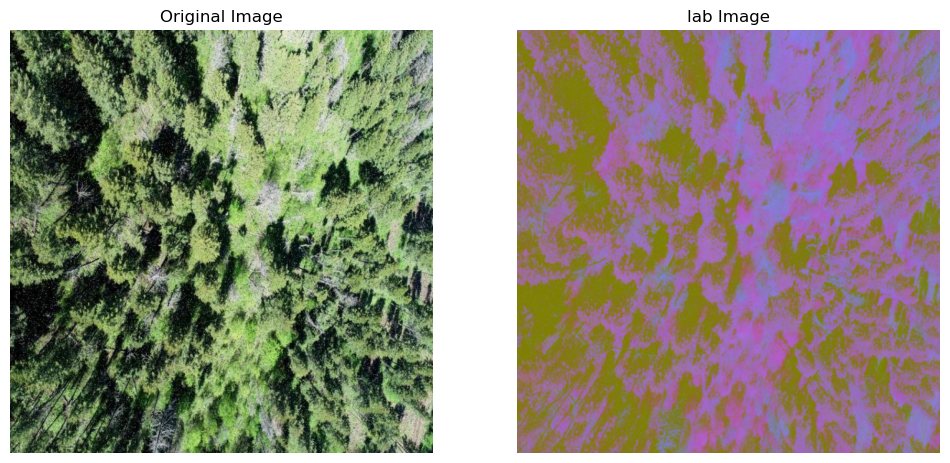

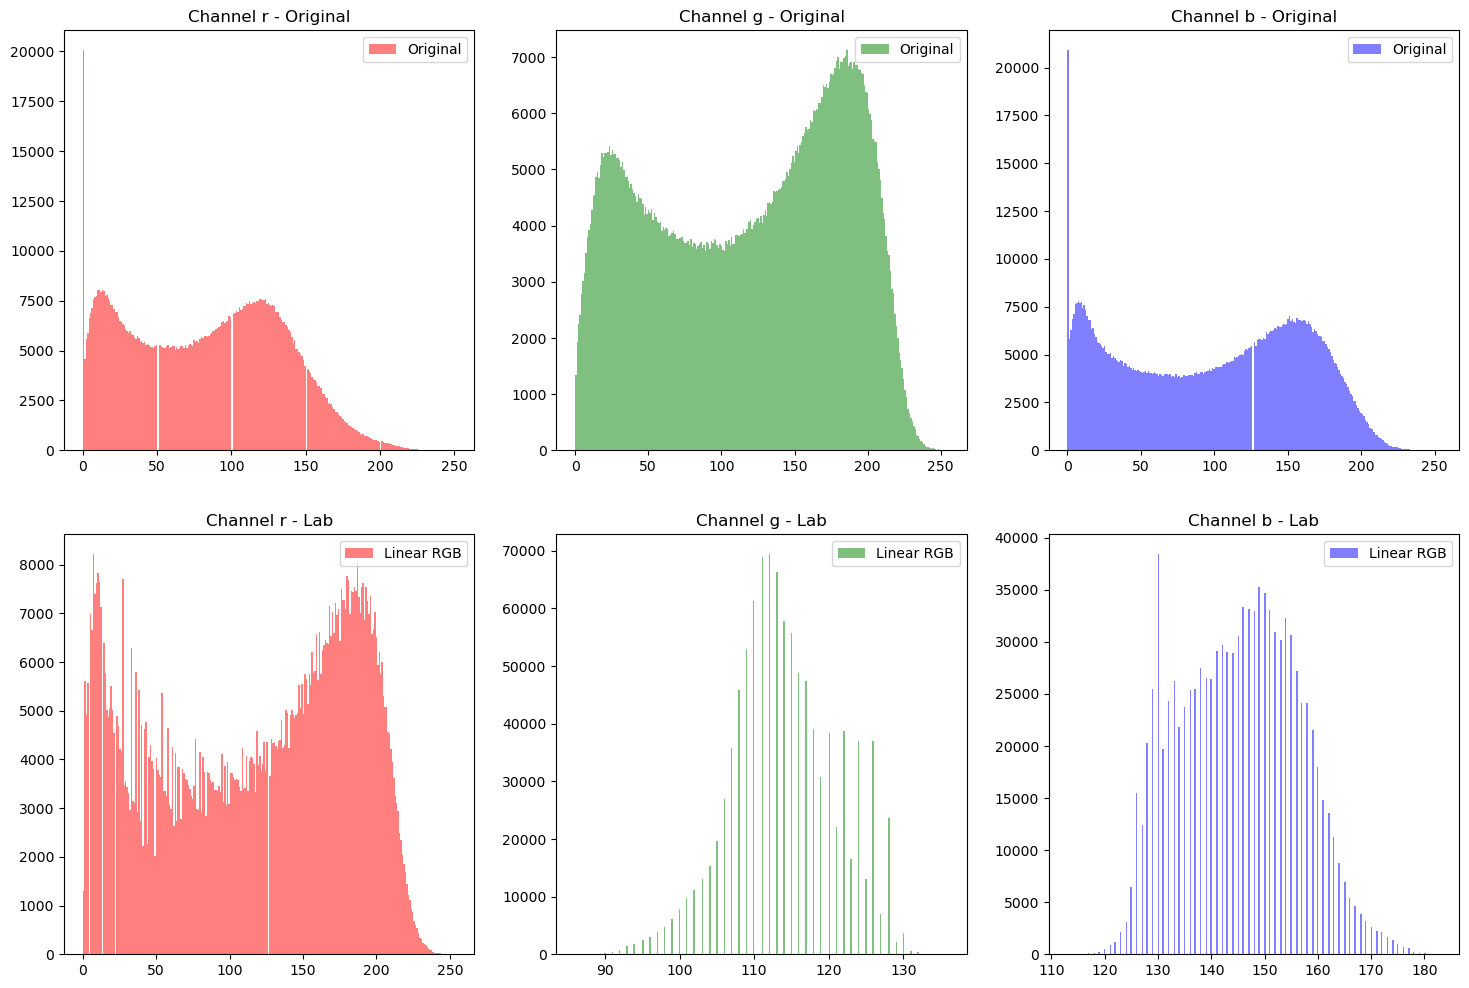

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

# Convert the image to linear RGB
yuv_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2LAB)


# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(yuv_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('lab Image')
axs[1].axis('off')
plt.savefig('lab.png')
plt.show()

# Plot histograms for the original and linear RGB images
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
colors = ('r', 'g', 'b')
for i in range(3):
    axs[0, i].hist(original_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Original')
    axs[0, i].legend(loc='upper right')
    axs[0, i].set_title(f'Channel {colors[i]} - Original')
    axs[1, i].hist(yuv_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Linear RGB')
    axs[1, i].legend(loc='upper right')
    axs[1, i].set_title(f'Channel {colors[i]} - Lab')
plt.show()


# linear

In [33]:
!rm -rf Forestfire2024-1-linear

In [34]:
!cp -r Forestfire2024-1 Forestfire2024-1-linear

In [30]:
# def convert_images_to_linear_rgb_in_place(input_dir):
#     for root, dirs, files in os.walk(input_dir):
#         for file_name in files:
#             if file_name.lower().endswith('.jpg'):
#                 input_path = os.path.join(root, file_name)
#                 image = cv2.imread(input_path)
#                 # Convert the image from BGR to RGB
#                 image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#                 # Normalize the image to [0, 1]
#                 image = image / 255.0
#                 # Apply gamma correction with gamma=2.2 to convert to linear RGB
#                 image = gamma_correct(image, 1/2.2)
#                 # Save the image
#                 output_path = os.path.join(root, 'linear_' + file_name)
#                 cv2.imwrite(output_path, image * 255)
#                 print(f"Converted {input_path} to Linear RGB")

In [13]:
import os
import cv2
import numpy as np

# def gamma_correct(input_image, gamma):
#     output_image = np.power(input_image, gamma).astype(np.uint8)
#     return output_image

def srgb_to_linear(c_srgb):
    c_linear = np.where(c_srgb <= 0.04045, c_srgb / 12.92, ((c_srgb + 0.055) / 1.055) ** 2.4)
    return c_linear

def convert_images_to_linear_rgb_in_place(input_dir):
    for root, dirs, files in os.walk(input_dir):
        for file_name in files:
            if file_name.lower().endswith('.jpg'):
                input_path = os.path.join(root, file_name)
                image = cv2.imread(input_path)

                # Convert sRGB to linear RGB
                image_linear = np.zeros_like(image, dtype=np.float32)
                for i in range(3):  # Assuming RGB channels
                    image_linear[:, :, i] = srgb_to_linear(image[:, :, i] / 255.0) * 255.0

                # Save the converted image
                cv2.imwrite(input_path, image_linear.astype(np.uint8))
                print(f"Converted {input_path} to Linear RGB")

In [18]:
dir_folder="ForestFire2023-5-linear"
input_directory = f"{dir_folder}/train"
convert_images_to_linear_rgb_in_place(input_directory)

input_directory = f"{dir_folder}/valid"
convert_images_to_linear_rgb_in_place(input_directory)

input_directory = f"{dir_folder}/test"
convert_images_to_linear_rgb_in_place(input_directory)

Converted ForestFire2023-5-linear/train/-763RD_7nVc_jpg.rf.19f584888daa50bbdb51f46605f33073.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/-763RD_7nVc_jpg.rf.c9076f9fe33b690bcc6b9c43ba821fbe.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/-763RD_7nVc_jpg.rf.f50f2ac1bd961665e90b38019af65f8f.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/0YebmVr8QYj_jpg.rf.49332dfc20006f0dfb08ff1a1fa75f8e.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/0YebmVr8QYj_jpg.rf.99f3fca614d26cedd07a528b9c599fd4.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/0YebmVr8QYj_jpg.rf.c3664a8ab6cd4fab171ee100dadcd896.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/1-pD4Idag_T_jpg.rf.241bed8cb2a775d318d8b4be839e1f01.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/1-pD4Idag_T_jpg.rf.b67989d5e9487b91ef8716e8fa822f5d.jpg to Linear RGB
Converted ForestFire2023-5-linear/train/1-pD4Idag_T_jpg.rf.e1cf568efb77e23bb481d57ebeaefbc0.jpg to Linear RGB
Converted 

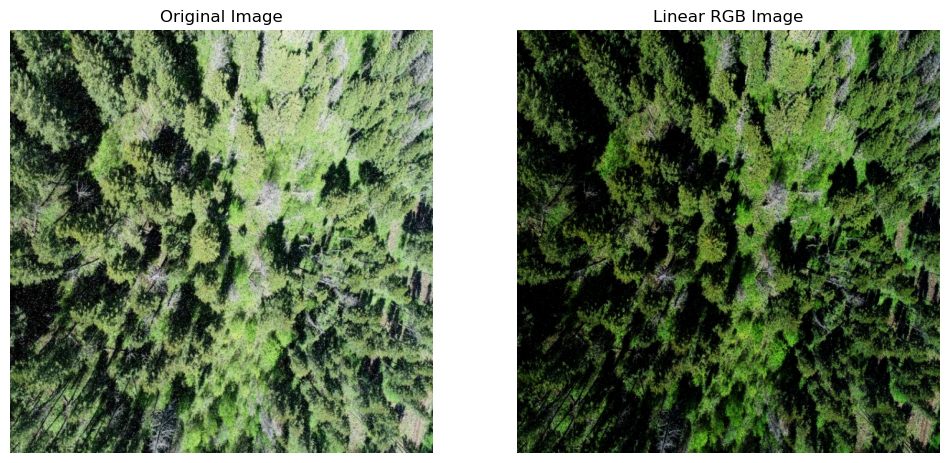

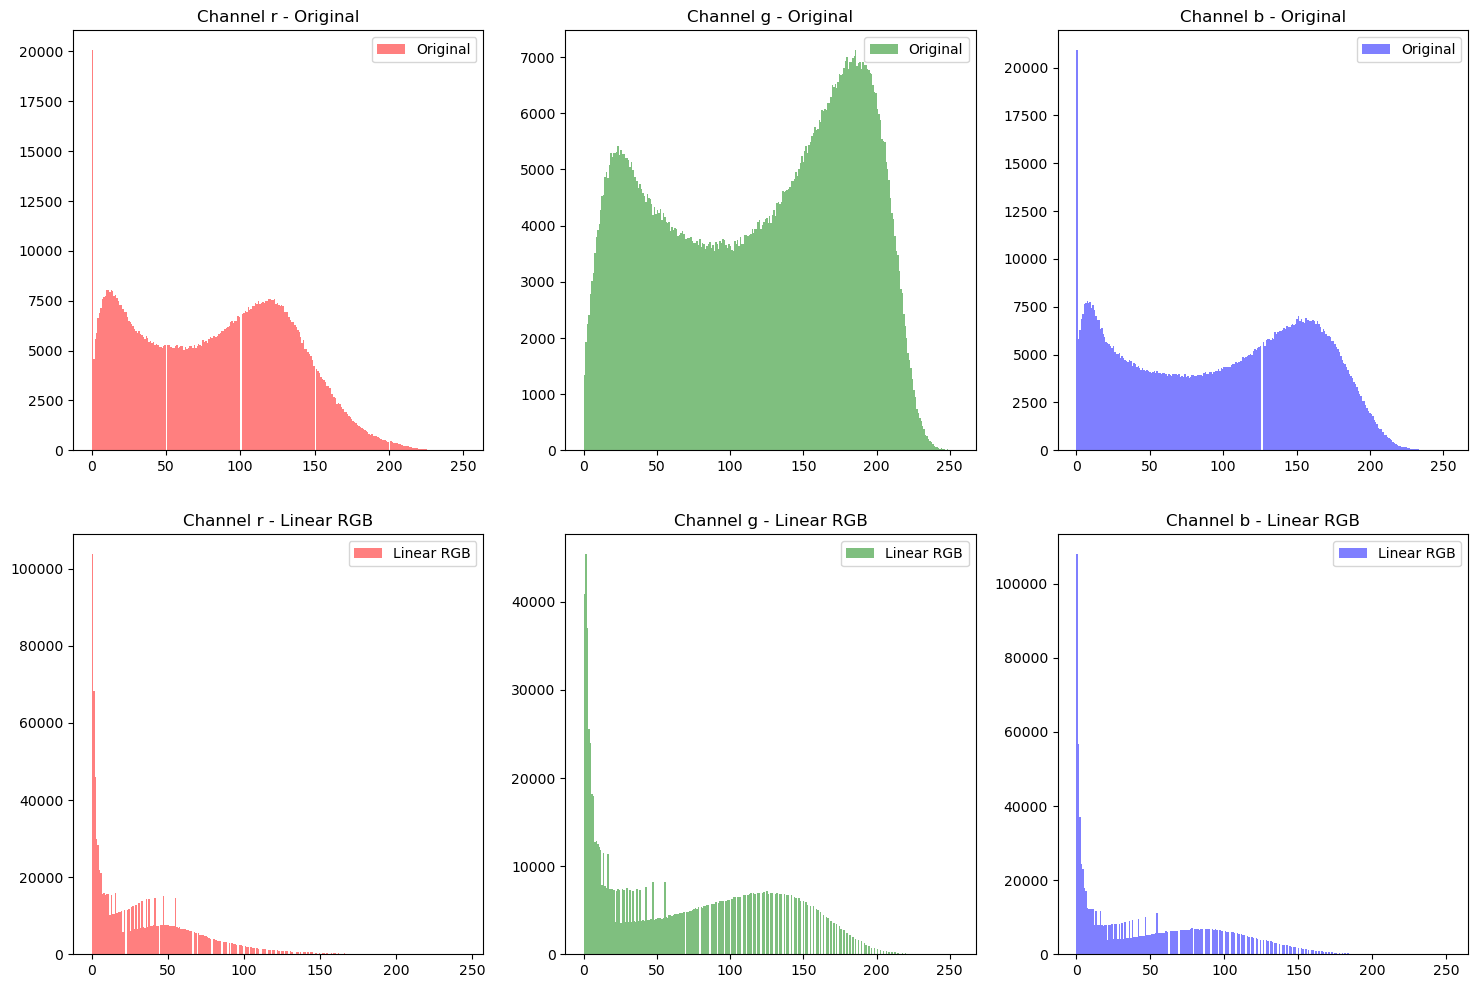

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

def srgb_to_linear(c_srgb):
    c_linear = np.where(c_srgb <= 0.04045, c_srgb / 12.92, ((c_srgb + 0.055) / 1.055) ** 2.4)
    return c_linear

# Convert the image to linear RGB
linear_image = srgb_to_linear(original_image.astype(np.float64) / 255.0)

# Convert the linear image back to the uint8 format for display
linear_image_display = (linear_image * 255).astype(np.uint8)

# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(linear_image_display, cv2.COLOR_BGR2RGB))
axs[1].set_title('Linear RGB Image')
axs[1].axis('off')
plt.show()

# Plot histograms for the original and linear RGB images
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
colors = ('r', 'g', 'b')
for i in range(3):
    axs[0, i].hist(original_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Original')
    axs[0, i].legend(loc='upper right')
    axs[0, i].set_title(f'Channel {colors[i]} - Original')
    axs[1, i].hist((linear_image[:, :, i] * 255).astype(np.uint8).flatten(), bins=256, color=colors[i], alpha=0.5, label='Linear RGB')
    axs[1, i].legend(loc='upper right')
    axs[1, i].set_title(f'Channel {colors[i]} - Linear RGB')
    cv2.imwrite(f'linear_rgb_image_channel_{colors[i]}.jpg', (linear_image[:, :, i] * 255).astype(np.uint8))
plt.show()

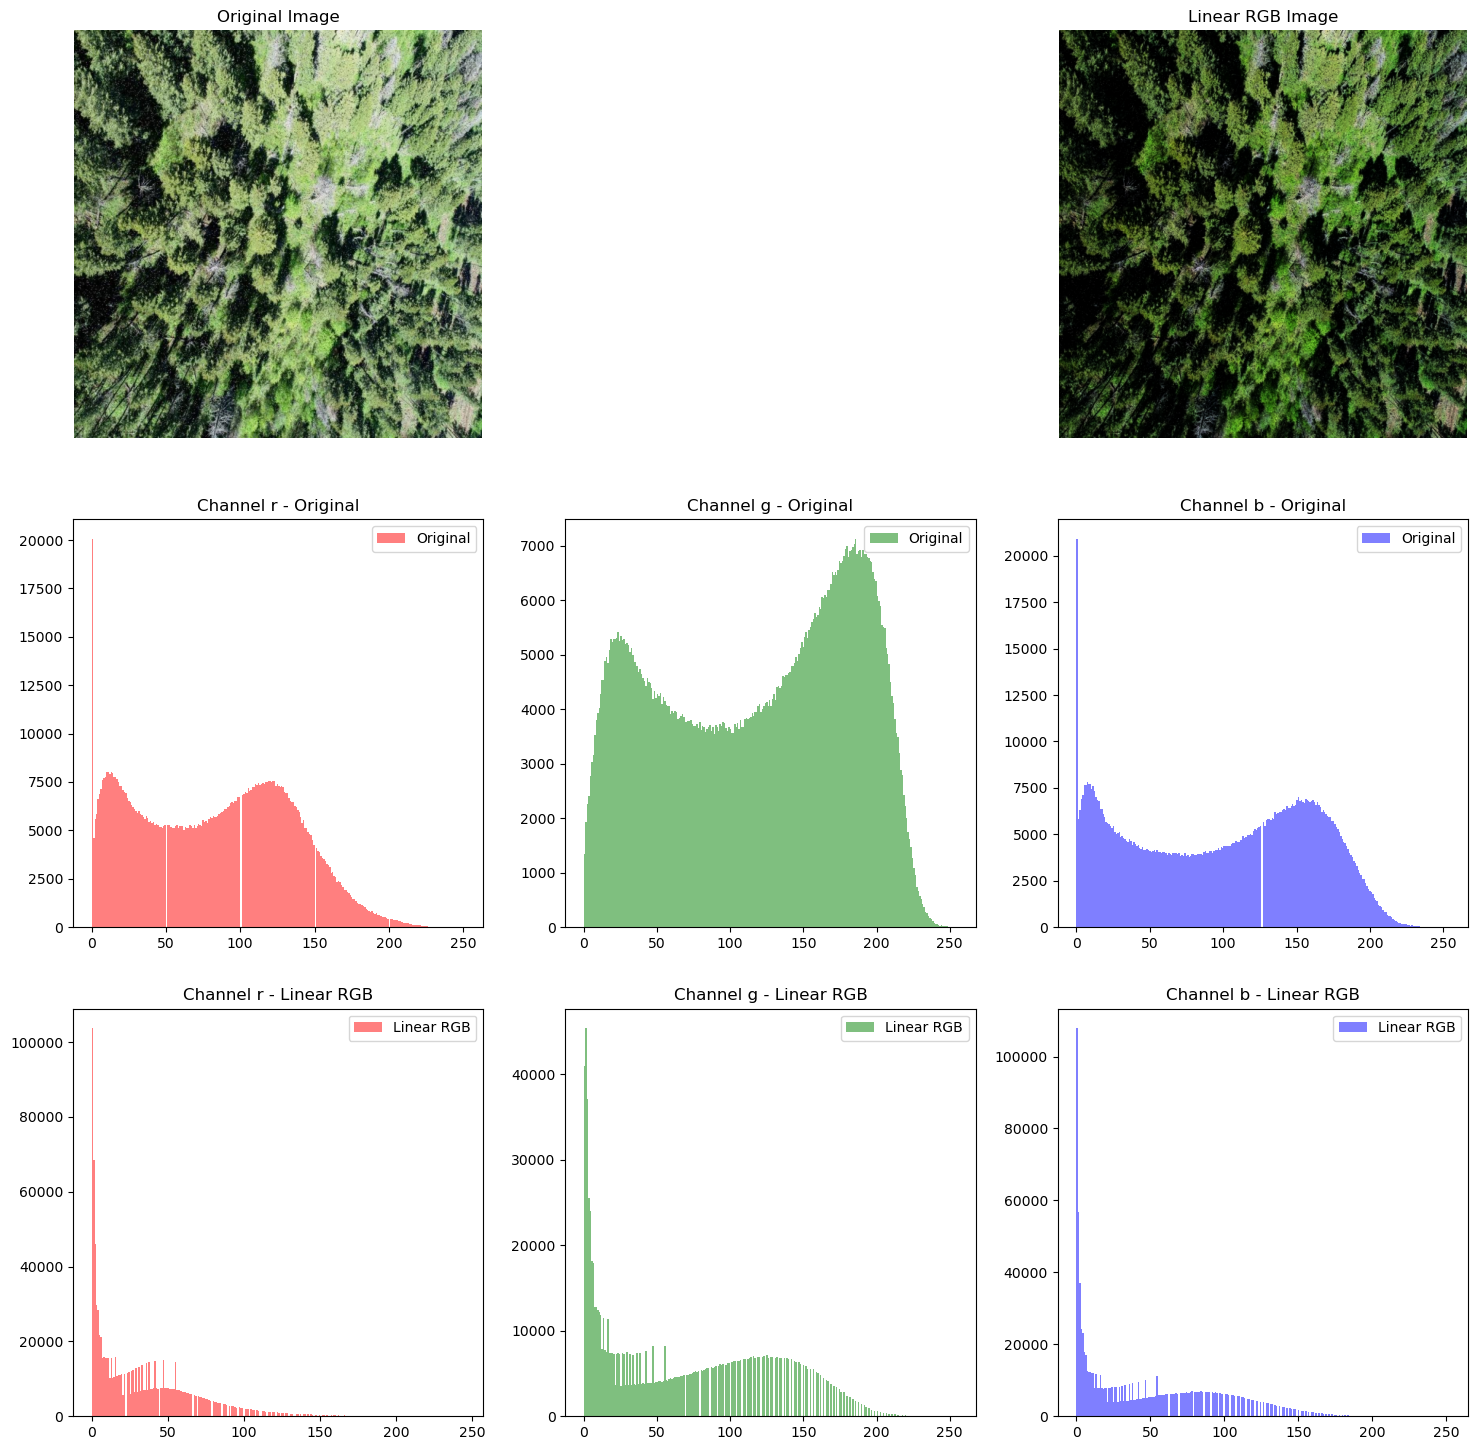

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

def srgb_to_linear(c_srgb):
    c_linear = np.where(c_srgb <= 0.04045, c_srgb / 12.92, ((c_srgb + 0.055) / 1.055) ** 2.4)
    return c_linear

# Convert the image to linear RGB
linear_image = srgb_to_linear(original_image.astype(np.float64) / 255.0)

# Convert the linear image back to the uint8 format for display
linear_image_display = (linear_image * 255).astype(np.uint8)

# Display the images side by side
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Plot original and linear RGB images
axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].axis('off')

axs[0, 2].imshow(cv2.cvtColor(linear_image_display, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('Linear RGB Image')
axs[0, 2].axis('off')

# Plot histograms for each channel
colors = ('r', 'g', 'b')
for i in range(3):
    axs[1, i].hist(original_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Original')
    axs[1, i].legend(loc='upper right')
    axs[1, i].set_title(f'Channel {colors[i]} - Original')

    axs[2, i].hist((linear_image[:, :, i] * 255).astype(np.uint8).flatten(), bins=256, color=colors[i], alpha=0.5, label='Linear RGB')
    axs[2, i].legend(loc='upper right')
    axs[2, i].set_title(f'Channel {colors[i]} - Linear RGB')

plt.savefig('forest_fire_analysis_combined.png')
plt.show()

# log rgb

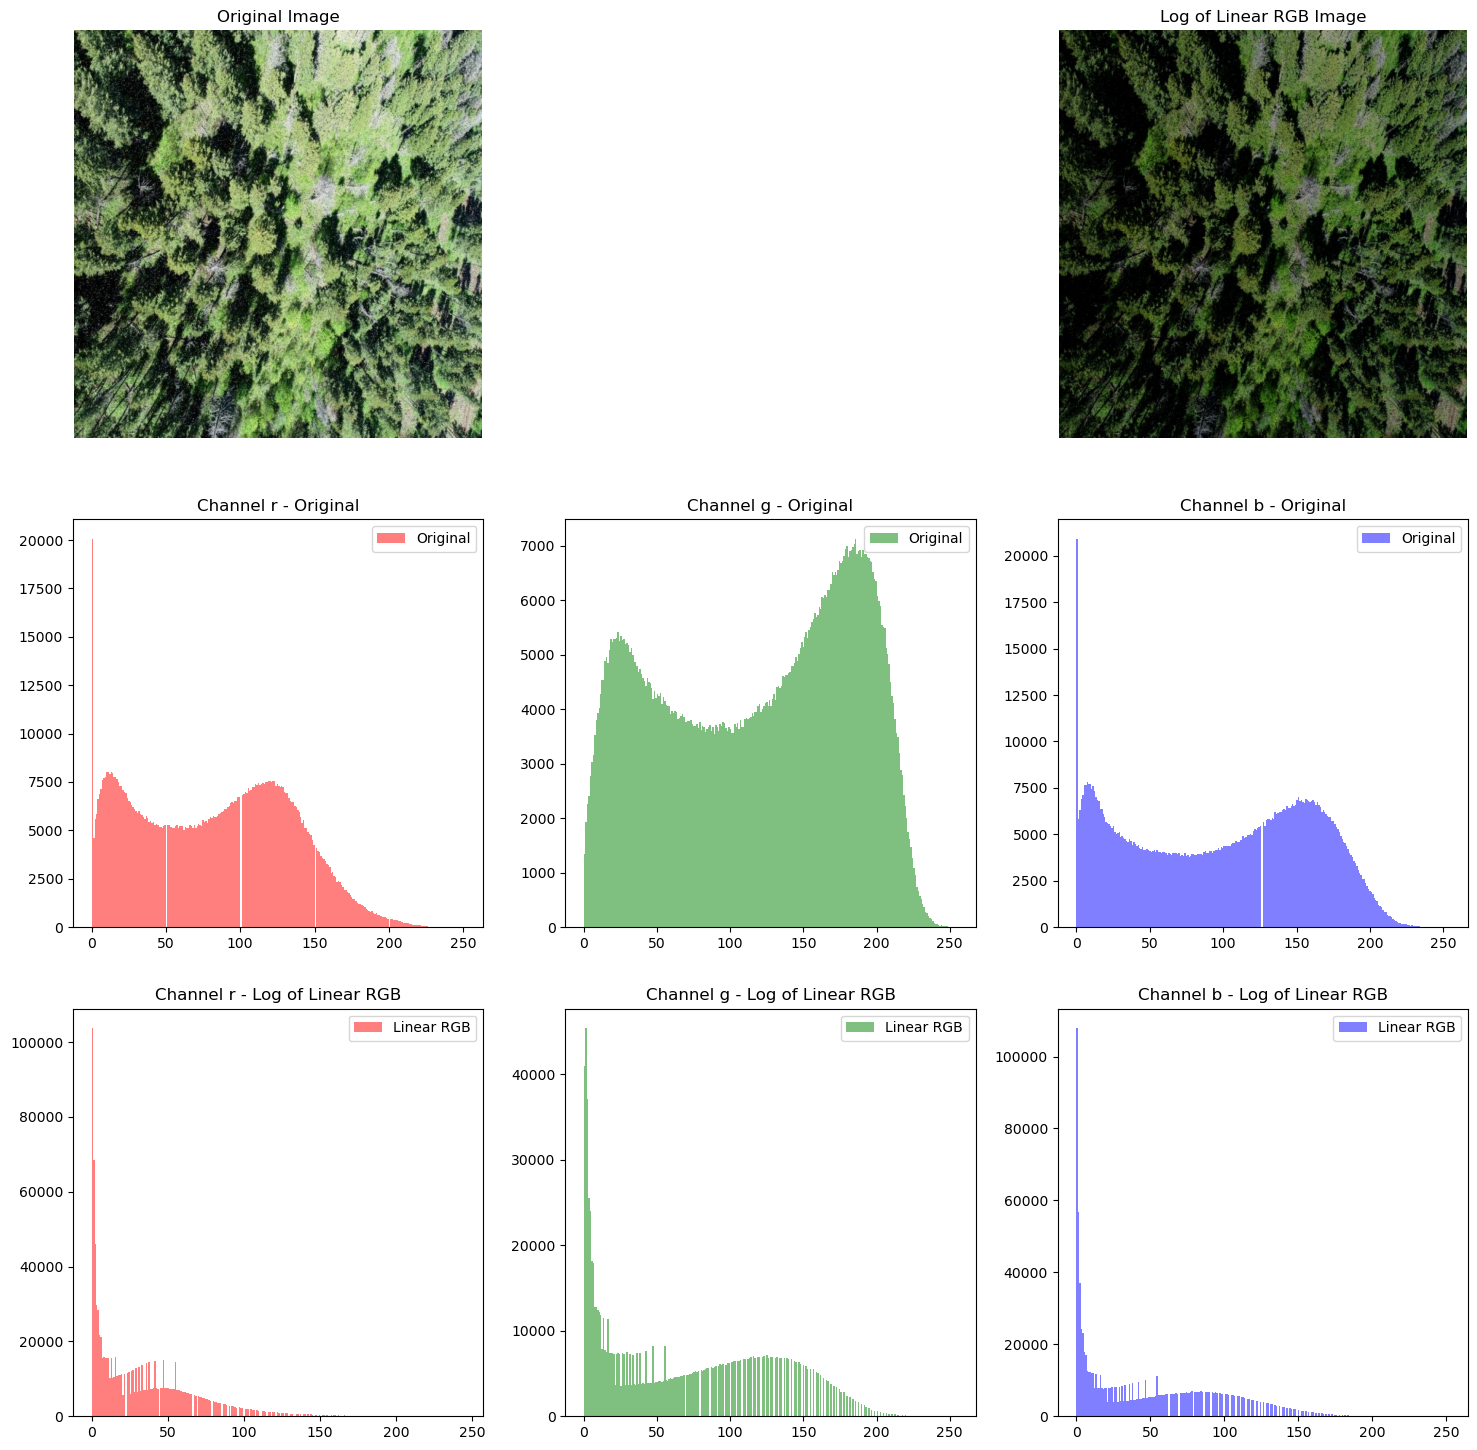

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

def srgb_to_linear(c_srgb):
    c_linear = np.where(c_srgb <= 0.04045, c_srgb / 12.92, ((c_srgb + 0.055) / 1.055) ** 2.4)
    return c_linear
    
def linear_to_log(c_linear):
    return np.log1p(c_linear)
    
# Convert the image to linear RGB
linear_image = srgb_to_linear(original_image.astype(np.float64) / 255.0)
image_log = linear_to_log(linear_image)

# Convert the log-linear image to the uint8 format for display
image_log_display = (image_log * 255).astype(np.uint8)

# Display the images side by side
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Plot original and linear RGB images
axs[0, 0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].axis('off')

axs[0, 2].imshow(cv2.cvtColor(image_log_display, cv2.COLOR_BGR2RGB))  # Use image_log_display here
axs[0, 2].set_title('Log of Linear RGB Image')
axs[0, 2].axis('off')

# Plot histograms for each channel
colors = ('r', 'g', 'b')
for i in range(3):
    axs[1, i].hist(original_image[:, :, i].flatten(), bins=256, color=colors[i], alpha=0.5, label='Original')
    axs[1, i].legend(loc='upper right')
    axs[1, i].set_title(f'Channel {colors[i]} - Original')

    axs[2, i].hist((linear_image[:, :, i] * 255).astype(np.uint8).flatten(), bins=256, color=colors[i], alpha=0.5, label='Linear RGB')
    axs[2, i].legend(loc='upper right')
    axs[2, i].set_title(f'Channel {colors[i]} - Log of Linear RGB')

plt.savefig('forest_fire_analysis_combined.png')
plt.show()

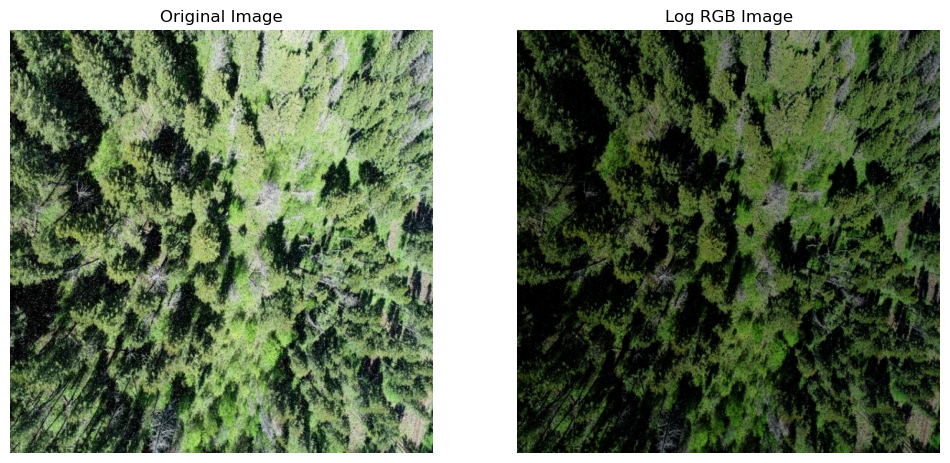

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')

def srgb_to_linear(c_srgb):
    c_linear = np.where(c_srgb <= 0.04045, c_srgb / 12.92, ((c_srgb + 0.055) / 1.055) ** 2.4)
    return c_linear
    
def linear_to_log(c_linear):
    return np.log1p(c_linear)
    
# Convert the image to linear RGB
linear_image = srgb_to_linear(original_image.astype(np.float64) / 255.0)
image_log = linear_to_log(linear_image)

# Convert the log-linear image to the uint8 format for display
image_log_display = (image_log * 255).astype(np.uint8)


# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv2.cvtColor(image_log_display, cv2.COLOR_BGR2RGB))
axs[1].set_title('Log RGB Image')
axs[1].axis('off')
plt.savefig('log.png')
plt.show()

In [7]:
original_image

array([[[164, 197, 183],
        [128, 163, 149],
        [ 91, 126, 112],
        ...,
        [116, 161, 134],
        [113, 158, 131],
        [107, 152, 125]],

       [[121, 154, 140],
        [ 98, 131, 117],
        [ 72, 107,  93],
        ...,
        [127, 172, 145],
        [121, 166, 139],
        [113, 158, 131]],

       [[ 60,  90,  77],
        [ 50,  83,  69],
        [ 40,  75,  61],
        ...,
        [131, 179, 151],
        [119, 167, 139],
        [109, 157, 129]],

       ...,

       [[ 80, 121,  93],
        [ 60, 101,  73],
        [ 13,  50,  24],
        ...,
        [ 17,  30,   8],
        [ 17,  34,  13],
        [ 10,  29,   8]],

       [[ 55,  96,  68],
        [ 30,  71,  43],
        [  0,  26,   0],
        ...,
        [  6,  21,   0],
        [ 13,  32,  11],
        [  4,  25,   3]],

       [[ 31,  72,  44],
        [ 26,  67,  39],
        [  7,  44,  18],
        ...,
        [  0,  15,   0],
        [ 18,  37,  16],
        [ 10,  31,   9]]

In [6]:
print(linear_image)

[[[0.37123768 0.55834039 0.4735315 ]
  [0.2158605  0.3662526  0.30054379]
  [0.10461648 0.20863687 0.16202938]
  ...
  [0.1746474  0.35640014 0.23839757]
  [0.16513219 0.34191442 0.22696587]
  [0.14702727 0.31398871 0.20507874]]

 [[0.19120168 0.32314321 0.26225066]
  [0.12213877 0.22696587 0.17788842]
  [0.06480327 0.14702727 0.10946171]
  ...
  [0.21223076 0.41254261 0.28314874]
  [0.19120168 0.38132601 0.25818285]
  [0.16513219 0.34191442 0.22696587]]

 [[0.0451862  0.10224173 0.07421357]
  [0.03189603 0.08650046 0.05951124]
  [0.02121901 0.0703601  0.04666509]
  ...
  [0.22696587 0.45078578 0.30946892]
  [0.18447499 0.38642943 0.25818285]
  [0.15292615 0.33716362 0.2195262 ]]

 ...

 [[0.08021982 0.19120168 0.10946171]
  [0.0451862  0.13013648 0.06662594]
  [0.00402472 0.03189603 0.00913406]
  ...
  [0.00560539 0.01298303 0.00242822]
  [0.00560539 0.01599629 0.00402472]
  [0.00303527 0.01228649 0.00242822]]

 [[0.03820437 0.11697067 0.05780543]
  [0.01298303 0.06301002 0.02415763]


In [5]:
print("Log Pixel Values:")
print(image_log)

Log Pixel Values:
[[[0.31571375 0.4436214  0.3876619 ]
  [0.19545206 0.31207166 0.26278248]
  [0.0994982  0.18949317 0.15016794]
  ...
  [0.16096802 0.30483424 0.21381826]
  [0.15283455 0.29409727 0.20454435]
  [0.13717361 0.27306733 0.18654491]]

 [[0.17496262 0.28001013 0.23289636]
  [0.11523648 0.20454435 0.16372336]
  [0.06279006 0.13717361 0.10387495]
  ...
  [0.19246226 0.34539135 0.24931701]
  [0.17496262 0.32304392 0.2296685 ]
  [0.15283455 0.29409727 0.20454435]]

 [[0.04419506 0.09734605 0.07158883]
  [0.03139792 0.08296195 0.05780771]
  [0.02099702 0.06799513 0.045609  ]
  ...
  [0.20454435 0.37210533 0.26962165]
  [0.16929963 0.32673169 0.2296685 ]
  [0.14230319 0.29055067 0.19846242]]

 ...

 [[0.07716456 0.17496262 0.10387495]
  [0.04419506 0.1223384  0.06450034]
  [0.00401664 0.03139792 0.0090926 ]
  ...
  [0.00558974 0.01289948 0.00242527]
  [0.00558974 0.0158697  0.00401664]
  [0.00303067 0.01221162 0.00242527]]

 [[0.03749266 0.11062026 0.05619641]
  [0.01289948 0.061

In [2]:
import os
import cv2
import numpy as np

def srgb_to_linear(c_srgb):
    c_linear = np.where(c_srgb <= 0.04045, c_srgb / 12.92, ((c_srgb + 0.055) / 1.055) ** 2.4)
    return c_linear

def linear_to_log(c_linear):
    c_log = np.log10(c_linear + 1)
    return c_log

def convert_images_to_log_rgb_in_place(input_dir):
    for root, dirs, files in os.walk(input_dir):
        for file_name in files:
            if file_name.lower().endswith('.jpg'):
                input_path = os.path.join(root, file_name)
                # OpenCV reads images in BGR format, convert it to RGB
                image = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)
                # Normalize the image to [0, 1]
                image_srgb = image / 255.0
                # Convert the image from sRGB to linear RGB
                image_linear = srgb_to_linear(image_srgb)
                # Convert the image from linear RGB to Log RGB
                image_log = linear_to_log(image_linear)
                # Save the image
                output_path = os.path.join(root, 'log_' + file_name)
                cv2.imwrite(output_path, image_log * 255)
                print(f"Converted {input_path} to log RGB")

In [23]:
input_directory = "ForestFire2023-5-log/train"

convert_images_to_log_rgb_in_place(input_directory)

input_directory = "ForestFire2023-5-log/valid"

convert_images_to_log_rgb_in_place(input_directory)

input_directory = "ForestFire2023-5-log/test"

convert_images_to_log_rgb_in_place(input_directory)

Converted ForestFire2023-5-log/train/-763RD_7nVc_jpg.rf.19f584888daa50bbdb51f46605f33073.jpg to log RGB
Converted ForestFire2023-5-log/train/-763RD_7nVc_jpg.rf.c9076f9fe33b690bcc6b9c43ba821fbe.jpg to log RGB
Converted ForestFire2023-5-log/train/-763RD_7nVc_jpg.rf.f50f2ac1bd961665e90b38019af65f8f.jpg to log RGB
Converted ForestFire2023-5-log/train/0YebmVr8QYj_jpg.rf.49332dfc20006f0dfb08ff1a1fa75f8e.jpg to log RGB
Converted ForestFire2023-5-log/train/0YebmVr8QYj_jpg.rf.99f3fca614d26cedd07a528b9c599fd4.jpg to log RGB
Converted ForestFire2023-5-log/train/0YebmVr8QYj_jpg.rf.c3664a8ab6cd4fab171ee100dadcd896.jpg to log RGB
Converted ForestFire2023-5-log/train/1-pD4Idag_T_jpg.rf.241bed8cb2a775d318d8b4be839e1f01.jpg to log RGB
Converted ForestFire2023-5-log/train/1-pD4Idag_T_jpg.rf.b67989d5e9487b91ef8716e8fa822f5d.jpg to log RGB
Converted ForestFire2023-5-log/train/1-pD4Idag_T_jpg.rf.e1cf568efb77e23bb481d57ebeaefbc0.jpg to log RGB
Converted ForestFire2023-5-log/train/1Xc7oQ_IwLN_jpg.rf.59f5cd27

# change channel of output

In [ ]:
# Load the original sRGB image
original_image = cv2.imread('Forestfire2024-1/train/__XAipv8jDpg_jpg.rf.fb7f112e399a5fdaba59fc830a9e21ae.jpg')
